### Question: Finding Outliers 

1. Using sorting to find the 25,50,75 percentile of a collection of numbers.
1. Use the rule about interquartile range to determine outliers
1. Try removing the lowest and highest deciles
1. Try truncating the lowest and highest deciles

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def find_percentiles(arr):
    arr_sort = np.sort(arr)
    return arr_sort[len(arr_sort) // 4], arr_sort[len(arr_sort) // 2], arr_sort[ ( 3* len(arr_sort) ) // 4]

def find_outliers(arr):
    n25, n50, n75 = find_percentiles(arr)
    iqr = n75 - n25
    upper = n75 + 1.5 * iqr
    lower = n25 - 1.5 * iqr
    
    return arr[(arr < lower) | (arr > upper)]

In [19]:
arr = np.random.randn(1000)

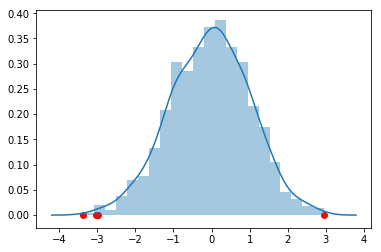

In [20]:
sns.distplot(arr)
plt.scatter(find_outliers(arr), np.zeros(len(find_outliers(arr))), color = 'r');

In [42]:
deciles = pd.cut(arr, 10)
min_deciles = np.min(deciles)
max_decile = np.max(deciles)

removed = arr[(deciles != min_deciles) & (deciles != max_decile)]

In [43]:
winsorized_data = np.where(deciles == min_deciles, min_deciles.right, arr)
winsorized_data = np.where(deciles == max_decile, max_decile.left, winsorized_data)

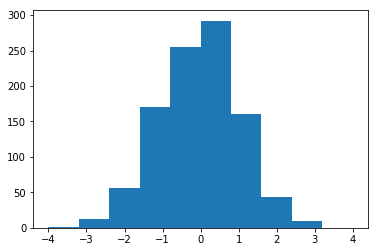

In [67]:
plt.hist(arr,bins=10, range=[-4,4]);

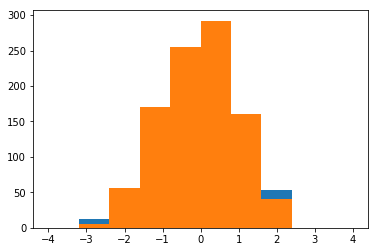

In [68]:
plt.hist(winsorized_data,10, range=[-4,4]);
plt.hist(removed,10, range=[-4,4]);